# Working with the `TonnageListAPI`

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/Tonnage%20List%20API/Working%20with%20the%20TonnageListAPI.ipynb).

## Setup
Install the Signal Ocean SDK:

In [ ]:
!pip install signal-ocean

Set your subscription key, acquired here: [https://apis.signalocean.com/profile](https://apis.signalocean.com/profile)

In [1]:
signal_ocean_api_key = ""  # replace with your subscription key

## Retrieving a historical tonnage list
First, we need to create an instance of the `TonnageListAPI`:

In [2]:
from signal_ocean import Connection
from signal_ocean.tonnage_list import TonnageListAPI

connection = Connection(signal_ocean_api_key)
api = TonnageListAPI(connection)


Then, we need to determine the parameters of the **historical tonnage list** (**HTL**). In order to fetch an HTL, we will need to specify:
- a loading port,
- a vessel class,
- a time frame.

Ports and vessel classes can be retrieved through the `get_ports` and `get_vessel_classes` methods:

In [3]:
api.get_vessel_classes()


(VesselClass(id=60, name='VLGCLpg'),
 VesselClass(id=61, name='MidsizeLpg'),
 VesselClass(id=62, name='HandyLpg'),
 VesselClass(id=63, name='SmallLpg'),
 VesselClass(id=69, name='VLOC'),
 VesselClass(id=70, name='Capesize'),
 VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=77, name='Handysize'),
 VesselClass(id=78, name='ULCV'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=83, name='FeederContainer'),
 VesselClass(id=84, name='VLCC'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'),
 VesselClass(id=88, name='MR2'),
 VesselClass(id=89, name='MR1'),
 VesselClass(id=90, name='Small'),
 VesselClass(id=91, name='LNGLng'),
 VesselClass(id=

Ports can be looked up by their name using the `PortFilter`:

In [4]:
from signal_ocean.tonnage_list import PortFilter

api.get_ports(PortFilter(name_like="rot"))

(Port(id=3689, name='Rotterdam'),
 Port(id=6625, name='Rota'),
 Port(id=8920, name='Crotone'),
 Port(id=15617, name='Rarotonga'),
 Port(id=4048, name='Rotterdam Anchorage'),
 Port(id=4429, name='Rotterdam Lightering Zone'),
 Port(id=4890, name='Bp Rotterdam Refinery'),
 Port(id=4895, name='Rotterdam Refinery (Esso)'),
 Port(id=5750, name='Vopak Terminal Eurotank'),
 Port(id=5754, name='Eurotank Amsterdam'),
 Port(id=6183, name='Eurotank Terminal Amsterdam'),
 Port(id=6328, name='Petrotitan Xiao Hu Terminal'),
 Port(id=6745, name='Rotim Bulk Terminal'),
 Port(id=6861, name='Rota Dock'),
 Port(id=6862, name='Damen Shiprepair Rotterdam'),
 Port(id=6863, name='Damen Shiprepair Van Brink Rotterdam'),
 Port(id=6865, name='Frigocare Rotterdam'),
 Port(id=6867, name='Lbc Rotterdam'),
 Port(id=7058, name='Phoenix Petroterminals & Industrial Park'),
 Port(id=8476, name='Rotterdam Bulk Terminal'),
 Port(id=9376, name='Crotone Bulk Terminal'),
 Port(id=12788, name='Rotterdam World Gateway'),
 Port

And so can vessel classes with the use of the `VesselClassFilter`:

In [5]:
from signal_ocean.tonnage_list import VesselClassFilter

api.get_vessel_classes(VesselClassFilter(name_like="MAX"))

(VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'))

Note that the search is case-insensitive and does not require specifying exact names.

We want our HTL to contain Aframax vessels in Ceyhan, with a 6-day forward laycan end, for the last 90 days:

In [6]:
from datetime import timedelta, date

vessel_class_filter = VesselClassFilter(name_like="aframax")
vessel_class = api.get_vessel_classes(vessel_class_filter)[0]

port_filter = PortFilter(name_like="ceyhan")
port = api.get_ports(port_filter)[0]

laycan_end_in_days = 6
today = date.today()
start_date = today - timedelta(days=5)

With the parameters above, we can now request an HTL:

In [7]:
from signal_ocean.tonnage_list import DateRange

htl = api.get_historical_tonnage_list(
    port, vessel_class, laycan_end_in_days, DateRange(start_date, today)
)


The resulting historical tonnage list is a Python object that contains a collection of tonnage lists, each of which has a timestamp and a collection of vessel data. The tonnage lists are ordered by date in descending order:

In [8]:
yesterdays_tl = htl[1]
print("Date:", yesterdays_tl.date)
print("Vessel count:", len(yesterdays_tl.vessels))
print("Example vessel:", yesterdays_tl.vessels[0])

Date: 2023-09-26 12:00:00+00:00
Vessel count: 90
Example vessel: Vessel(imo=9038842, name='Icaro', vessel_class='Aframax', ice_class=None, year_built=1993, deadweight=99450, length_overall=243.97, breadth_extreme=46, market_deployment='Program', push_type='Not Pushed', open_port_id=8805, open_port='Taizhou (Zhejiang)', open_date=datetime.datetime(2022, 10, 22, 10, 57, 49, 215000, tzinfo=datetime.timezone.utc), operational_status='Laden', commercial_operator_id=1219, commercial_operator='PDVSA', commercial_status='Available', eta=datetime.datetime(2022, 11, 18, 8, 0, tzinfo=datetime.timezone.utc), latest_ais=datetime.datetime(2022, 10, 19, 0, 23, 51, tzinfo=datetime.timezone.utc), subclass='Dirty', willing_to_switch_subclass=False, open_prediction_accuracy='Narrow Area', open_areas=(Area(id=24726, name='Central China', location_taxonomy='Narrow Area', taxonomy_id=4), Area(id=17, name='China / Taiwan', location_taxonomy='Wide Area', taxonomy_id=5), Area(id=55, name='China', location_taxo

The result can also be converted into a Pandas data frame:

In [9]:
data_frame = htl.to_data_frame()
data_frame

name vessel_class ice_class  \
date                      imo                                               
2023-09-26 12:00:00+00:00 9038842            Icaro      Aframax       NaN   
                          9543512       Paramaconi      Aframax       NaN   
                          9199713          Bovista      Aframax       NaN   
                          9133587            Pablo      Aframax       NaN   
                          9187629          Artavil      Aframax       NaN   
...                                            ...          ...       ...   
2023-09-22 12:00:00+00:00 9304643            Chris      Aframax       NaN   
                          9865116           Sparto      Aframax       NaN   
                          9920497          Newbury      Aframax       NaN   
                          9791298   Navig8 Promise      Aframax       NaN   
                          9460576  Safeen Baroness      Aframax       NaN   

                                   year_built  deadweight  length_overall  \
date                      imo                                               
2023-09-26 12:00:00+00:00 9038842        1993       99450          243.97   
                          9543512        2011      104554          228.60   
                          9199713        1999      106644          240.50   
                          9133587        1997       96773          232.04   
                          9187629        2000       99144          248.00   
...                                       ...         ...             ...   
2023-09-22 12:00:00+00:00 9304643        2004      105778          239.00   
                          9865116        2020      115468          249.90   
                          9920497        2022      112095          237.00   
                          9791298        2019      109992          249.90   
                          9460576        2011      105335          228.60   

                                   breadth_extreme subclass  \
date                      imo                                 
2023-09-26 12:00:00+00:00 9038842               46    Dirty   
                          9543512               42    Dirty   
                          9199713               42    Dirty   
                          9133587               42    Dirty   
                          9187629               43    Dirty   
...                                            ...      ...   
2023-09-22 12:00:00+00:00 9304643               42    Dirty   
                          9865116               44    Dirty   
                          9920497               44    Dirty   
                          9791298               44    Dirty   
                          9460576               42    Dirty   

                                  market_deployment_point_in_time  \
date                      imo                                       
2023-09-26 12:00:00+00:00 9038842                         Program   
                          9543512                         Program   
                          9199713                        Contract   
                          9133587                        Contract   
                          9187629                        Contract   
...                                                           ...   
2023-09-22 12:00:00+00:00 9304643                        Contract   
                          9865116                           Relet   
                          9920497                            Spot   
                          9791298                            Spot   
                          9460576                            Spot   

                                  push_type_point_in_time  ...  \
date                      imo                              ...   
2023-09-26 12:00:00+00:00 9038842              Not Pushed  ...   
                          9543512              Not Pushed  ...   
                          9199713              Not Pushed  .

### Example 1 - Plotting a supply trend
The data frame format makes it very easy to generate a supply trend plot.

We'll generate a supply trend from the beginning of the year, but we'll also filter the vessel list by looking for vessels that:
- are pushed,
- have a market deployment type of "Relet" or "Spot",
- their commercial status is available, cancelled or failed,
- are crude oil tankers (their vessel subclass is "Dirty"),
- their AIS information is no older than 5 days.

Filtering can be achieved by creating an instance of a `VesselFilter` and passing it to the `get_historical_tonnage_list` method. A `VesselFilter` meeting the above criteria will look as follows:

In [10]:
from signal_ocean.tonnage_list import (
    VesselFilter,
    PushType,
    MarketDeployment,
    CommercialStatus,
    VesselSubclass,
)

vessel_filter = VesselFilter(
    push_types=[PushType.PUSHED],
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    commercial_statuses=[
        CommercialStatus.AVAILABLE,
        CommercialStatus.CANCELLED,
        CommercialStatus.FAILED,
    ],
    vessel_subclass=VesselSubclass.DIRTY,
    latest_ais_since=5,
)


Note the usage of the `PushType`, `MarketDeployment`, `CommercialStatus`, and `VesselSubclass`. These are enum-like classes that contain constants for all the possible values for a given `VesselFilter` parameter. To list the available values for any of the classes, just invoke `list()` on the class:

In [11]:
list(CommercialStatus)

['On Subs', 'Failed', 'Cancelled', 'Available', 'Poss Fixed']

You can use these values directly or use a corresponding class member:

In [12]:
CommercialStatus.ON_SUBS == 'On Subs'

True

Let's get the HTL for our filter:

In [43]:
beginning_of_year = date(today.year, 1, 1)

htl_for_supply_trend = api.get_historical_tonnage_list(
    port,
    vessel_class,
    laycan_end_in_days,
    DateRange(start_date, today),
    vessel_filter=vessel_filter,
)

supply_trend_data_frame = htl_for_supply_trend.to_data_frame()
supply_trend_data_frame


name vessel_class ice_class  \
date                      imo                                                  
2023-09-26 12:00:00+00:00 9437684           Chrysalis      Aframax       NaN   
                          9592264      Nissos Serifos      Aframax       NaN   
                          9386536  Stealth Haralambos      Aframax       NaN   
                          9231468               Giuse      Aframax       NaN   
                          9592305        Nissos Delos      Aframax       NaN   
...                                               ...          ...       ...   
2023-09-22 12:00:00+00:00 9309423      Minerva Nounou      Aframax        1A   
                          9386536  Stealth Haralambos      Aframax       NaN   
                          9388364             Merbabu      Aframax       NaN   
                          9865116              Sparto      Aframax       NaN   
                          9920497             Newbury      Aframax       NaN   

                                   year_built  deadweight  length_overall  \
date                      imo                                               
2023-09-26 12:00:00+00:00 9437684        2010      115867          248.96   
                          9592264        2012      115689          248.97   
                          9386536        2009      113021          249.96   
                          9231468        2002      109390          244.60   
                          9592305        2012      115691          248.97   
...                                       ...         ...             ...   
2023-09-22 12:00:00+00:00 9309423        2006      114850          253.59   
                          9386536        2009      113021          249.96   
                          9388364        2008      105746          243.97   
                          9865116        2020      115468          249.90   
                          9920497        2022      112095          237.00   

                                   breadth_extreme subclass  \
date                      imo                                 
2023-09-26 12:00:00+00:00 9437684               44    Dirty   
                          9592264               44    Dirty   
                          9386536               44    Dirty   
                          9231468               42    Dirty   
                          9592305               44    Dirty   
...                                            ...      ...   
2023-09-22 12:00:00+00:00 9309423               44    Dirty   
                          9386536               44    Dirty   
                          9388364               42    Dirty   
                          9865116               44    Dirty   
                          9920497               44    Dirty   

                                  market_deployment_point_in_time  \
date                      imo                                       
2023-09-26 12:00:00+00:00 9437684                            Spot   
                          9592264                            Spot   
                          9386536                            Spot   
                          9231468                           Relet   
                          9592305                            Spot   
...                                                           ...   
2023-09-22 12:00:00+00:00 9309423                            Spot   
                          9386536                            Spot   
                          9388364                            Spot   
                          9865116                           Relet   
                          9920497                            Spot   

                                  push_type_point_in_time  ...  \
date                      imo                              ...   
2023-09-26 12:00:00+00:00 9437684                  Pushed  ...   
                          9592264                  Pushed  ...   
                        

Now, we can generate the plot:

<AxesSubplot: title={'center': 'Ceyhan Aframax Laycan 6 days'}, xlabel='date', ylabel='Vessel count'>

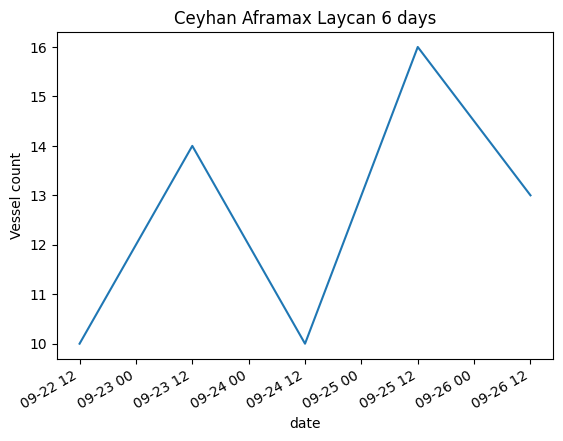

In [44]:
from signal_ocean.tonnage_list import IndexLevel

supply_trend = supply_trend_data_frame.groupby(
    IndexLevel.DATE, sort=True
).size()

plot = supply_trend.plot()
plot.set_ylabel("Vessel count")
plot.set_title("Ceyhan Aframax Laycan 6 days")
plot


### Example 2 - Generating an Excel sheet
The data frame can be easily saved as an Excel file by using Pandas's built-in `to_excel()` function.

Before we do that, we need to remove all the time zone information from all timestamps in the data frame. This is because Excel does not support storing time zone information along with timestamps. However, Signal Ocean's SDK always provides time zone information to make all timestamp-based computation unambiguous.

In [70]:
import pandas as pd

supply_trend_data_frame["open_date_point_in_time"] = pd.to_datetime(supply_trend_data_frame["open_date_point_in_time"]).dt.tz_localize(None)
supply_trend_data_frame["eta_point_in_time"] = pd.to_datetime(supply_trend_data_frame["eta_point_in_time"]).dt.tz_localize(None)
supply_trend_data_frame["latest_ais_point_in_time"] = pd.to_datetime(supply_trend_data_frame["latest_ais_point_in_time"]).dt.tz_localize(None)

without_time_zones = (
    supply_trend_data_frame.reset_index()
    .set_index(IndexLevel.IMO)
)
without_time_zones["date"] = pd.to_datetime(without_time_zones["date"]).dt.tz_localize(None)

Now, we can generate the Excel file:

In [71]:
without_time_zones.to_excel('Ceyhan_Afra_6days_history.xlsx')